In [44]:
import reciprocalspaceship as rs
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import os
import os.path
import gemmi as gm
import seaborn as sns
import matplotlib.gridspec as gridspec

new_rc_params = {
    'text.usetex': False,
    "svg.fonttype": 'none',
    "font.size" : 18,
    #"font.family" : "sans-serif",
    #"font.sans-serif" : ["Nimbus Sans"],
}
plt.rcParams.update(new_rc_params)
directory_search_pattern = "careless_runs/" #directory in which to search for tabular outputs. 

This notebook is for calculating, compiling, and visualizing merging statistics. 

In [45]:
def get_careless_params(dirpath):
#     print(os.path.join(dirpath, 'inputs_params.log'))
    with open(os.path.join(dirpath, 'inputs_params.log')) as params:
        line = params.readline()
        line = params.readline()
        args_list=line.split('--')
#             print(args_list)
        p_={}
        bDisableImageScale=False
        for tag in args_list:
            if 'dmin' in tag:
                p_['DMIN']=tag.split('=')[1].split(' ')[0]
            if 'positional-encoding-frequencies' in tag:
                p_['PEF'] =tag.split('=')[1].split(' ')[0]
            if 'iterations' in tag:
                p_['ITER']=tag.split('=')[1].split(' ')[0]
            if 'mlp-layers' in tag:
                p_['MLPL']=tag.split('=')[1].split(' ')[0]
            if 'studentt-likelihood-dof' in tag:
                p_['STDOF'] =tag.split('=')[1].split(' ')[0]
            if 'image-layers' in tag:
                p_['IL']  =tag.split('=')[1].split(' ')[0]
            if 'positional-encoding-keys' in tag:
                p_['PE-keys']=tag.split('=')[1].split(' ')[0]
            if 'seed' in tag:
                p_['SEED']=tag.split('=')[1].split(' ')[0]
            if 'double-wilson-parents' in tag:
                p_['DW_list']=tag.split('=')[1].split(' ')[0]
            if 'double-wilson-r' in tag:
                DWr_list = tag.split('=')[1]
                p_['rDW']  = DWr_list.split(',')[-1]
            if 'disable-image-scales' in tag:
                bDisableImageScale=True
            if 'refine-uncertainties' in tag:
                p_['RU']=1
        if bDisableImageScale:
            p_['IL']=-1
        if 'STDOF' not in p_:
            p_['STDOF']=-1
        if 'RU' not in p_:
            p_['RU']=0
        if 'PEF' not in p_:
            p_['PEF']=0
        if 'rDW' not in p_:
            p_['rDW']=-1
        run_param=pd.DataFrame(data=p_,index=[0])
        run_param.DMIN  = run_param.DMIN.astype( 'float')
        run_param.SEED  = run_param.SEED.astype( 'int64')
        run_param.ITER  = run_param.ITER.astype( 'int64')
        run_param.STDOF = run_param.STDOF.astype('float')
        run_param.RU    = run_param.RU.astype(   'int64')
        run_param.MLPL  = run_param.MLPL.astype( 'int64')
        run_param.IL    = run_param.IL.astype(   'int64')
        run_param.rDW   = run_param.rDW.astype(  'float')
        run_param.PEF   = run_param.PEF.astype(  'int64')
        return run_param

### Run scripts to calculate merging statistics

We calculate merging statistics with a set of scripts in `./scripts`. repeats for the CCpred calculation are found in `careless_runs_pred`. 

In [3]:
!pwd

/n/hekstra_lab/projects/dw-examples/lysozyme-laue-dials


In [19]:
%%bash

sh ./scripts/1_HEWL_anom_unfriedelize.sh

mkdir: cannot create directory ‘../phenix_poly_dw_mlp32_PEF_R0.98438_0720_dmin1pt8’: File exists


In [7]:
%%bash

sh ./scripts/2_HEWL_anom_refine.sh

Submitted batch job 57455336


In [9]:
%%bash

sh ./scripts/3_HEWL_anom_peak_heights.sh

In [20]:
%%bash

sh ./scripts/run_ccs.sh merge_HEWL_dw_mlp32_PEF_*

./careless_runs/merge_HEWL_dw_mlp32_PEF_R0.00000_0720_dmin1.8_57301243_poly
/n/hekstra_lab/projects/dw-examples/lysozyme-laue-dials/careless_runs/merge_HEWL_dw_mlp32_PEF_R0.00000_0720_dmin1.8_57301243_poly
./careless_runs/merge_HEWL_dw_mlp32_PEF_R0.50000_0720_dmin1.8_57301244_poly
/n/hekstra_lab/projects/dw-examples/lysozyme-laue-dials/careless_runs/merge_HEWL_dw_mlp32_PEF_R0.50000_0720_dmin1.8_57301244_poly
./careless_runs/merge_HEWL_dw_mlp32_PEF_R0.75000_0720_dmin1.8_57301245_poly
/n/hekstra_lab/projects/dw-examples/lysozyme-laue-dials/careless_runs/merge_HEWL_dw_mlp32_PEF_R0.75000_0720_dmin1.8_57301245_poly
./careless_runs/merge_HEWL_dw_mlp32_PEF_R0.87500_0720_dmin1.8_57311509_poly
/n/hekstra_lab/projects/dw-examples/lysozyme-laue-dials/careless_runs/merge_HEWL_dw_mlp32_PEF_R0.87500_0720_dmin1.8_57311509_poly
./careless_runs/merge_HEWL_dw_mlp32_PEF_R0.93750_0720_dmin1.8_57301247_poly
/n/hekstra_lab/projects/dw-examples/lysozyme-laue-dials/careless_runs/merge_HEWL_dw_mlp32_PEF_R0.937

Traceback (most recent call last):
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless/bin/careless.ccanom", line 8, in <module>
    sys.exit(main())
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless/lib/python3.10/site-packages/careless/stats/ccanom.py", line 152, in main
    run_analysis(parser)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless/lib/python3.10/site-packages/careless/stats/ccanom.py", line 85, in run_analysis
    _ds = rs.read_mtz(m)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open *xval_combined.mtz: No such file or directory
Traceback (most recent call last):
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless/bin/

./careless_runs/merge_HEWL_dw_mlp32_PEF_Rt0.98438_0720_dmin1.8_57451883_poly
/n/hekstra_lab/projects/dw-examples/lysozyme-laue-dials/careless_runs/merge_HEWL_dw_mlp32_PEF_Rt0.98438_0720_dmin1.8_57451883_poly


Traceback (most recent call last):
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless/bin/careless.ccanom", line 8, in <module>
    sys.exit(main())
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless/lib/python3.10/site-packages/careless/stats/ccanom.py", line 152, in main
    run_analysis(parser)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless/lib/python3.10/site-packages/careless/stats/ccanom.py", line 85, in run_analysis
    _ds = rs.read_mtz(m)
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless/lib/python3.10/site-packages/reciprocalspaceship/io/mtz.py", line 187, in read_mtz
    gemmi_mtz = gemmi.read_mtz_file(mtzfile)
FileNotFoundError: [Errno 2] Failed to open *xval_combined.mtz: No such file or directory
Traceback (most recent call last):
  File "/net/holy-nfsisilon/ifs/rc_labs/hekstra_lab/people/hwang/anaconda/envs/careless/bin/

In [9]:
%%bash

sh ./scripts/run_ccs_pred.sh merge_HEWL_dw_mlp32_PEF_*

./careless_runs_pred/merge_HEWL_dw_mlp32_PEF_R0.00000_0720_dmin1.8_57312544_poly
/n/hekstra_lab/projects/dw-examples/lysozyme-laue-dials/careless_runs_pred/merge_HEWL_dw_mlp32_PEF_R0.00000_0720_dmin1.8_57312544_poly
./careless_runs_pred/merge_HEWL_dw_mlp32_PEF_R0.00000_0720_dmin1.8_57315470_poly
/n/hekstra_lab/projects/dw-examples/lysozyme-laue-dials/careless_runs_pred/merge_HEWL_dw_mlp32_PEF_R0.00000_0720_dmin1.8_57315470_poly
./careless_runs_pred/merge_HEWL_dw_mlp32_PEF_R0.00000_0720_dmin1.8_57318111_poly
/n/hekstra_lab/projects/dw-examples/lysozyme-laue-dials/careless_runs_pred/merge_HEWL_dw_mlp32_PEF_R0.00000_0720_dmin1.8_57318111_poly
./careless_runs_pred/merge_HEWL_dw_mlp32_PEF_R0.50000_0720_dmin1.8_57312545_poly
/n/hekstra_lab/projects/dw-examples/lysozyme-laue-dials/careless_runs_pred/merge_HEWL_dw_mlp32_PEF_R0.50000_0720_dmin1.8_57312545_poly
./careless_runs_pred/merge_HEWL_dw_mlp32_PEF_R0.50000_0720_dmin1.8_57317228_poly
/n/hekstra_lab/projects/dw-examples/lysozyme-laue-dials

# Importing $CC_\text{pred}$

We now import overall CCpred values from each of the repeats. 

In [57]:
count=0
results_list=[]
params_list=[]
id_list=[]

directory_search_pattern_pred= "careless_runs_pred/" 
for dirpath, dirnames, filenames in os.walk("."):
    if ('ccpred_overall_careless.csv' in filenames) and (directory_search_pattern_pred in dirpath):
        tmp=pd.read_csv(os.path.join(dirpath, 'ccpred_overall_careless.csv'))
        
        try:
            print(dirpath)
            tmp_id=dirpath.split('_')[-5][1:]
            if tmp_id=="neg1":
                tmp_id = -1
            job_id=int(dirpath.split('_')[-2]) # appropriate index may vary from run to run!
        except:
            print(dirpath.split('_')[-5])
            
        tmp["grid_id"]=float(tmp_id)
        tmp["job_id"]=job_id
        print(f"Read-in values of grid_id: {tmp_id},  job_id: {job_id}")
        results_list.append(tmp)
        careless_params=get_careless_params(dirpath)
        careless_params["grid_id"]=tmp_id
        careless_params["job_id"]=job_id
        params_list.append(careless_params)

all_params =pd.concat(params_list)
all_results_ccpred=pd.concat(results_list)

./careless_runs_pred/merge_HEWL_dw_mlp32_PEF_R-1_0720_dmin1.8_57315044_poly
Read-in values of grid_id: -1,  job_id: 57315044
./careless_runs_pred/merge_HEWL_dw_mlp32_PEF_R-1_0720_dmin1.8_57318107_poly
Read-in values of grid_id: -1,  job_id: 57318107
./careless_runs_pred/merge_HEWL_dw_mlp32_PEF_R0.96875_0720_dmin1.8_57319127_poly
Read-in values of grid_id: 0.96875,  job_id: 57319127
./careless_runs_pred/merge_HEWL_dw_mlp32_PEF_R0.99219_0720_dmin1.8_57317835_poly
Read-in values of grid_id: 0.99219,  job_id: 57317835
./careless_runs_pred/merge_HEWL_dw_mlp32_PEF_R0.99990_0720_dmin1.8_57315043_poly
Read-in values of grid_id: 0.99990,  job_id: 57315043
./careless_runs_pred/merge_HEWL_dw_mlp32_PEF_R0.98438_0720_dmin1.8_57317809_poly
Read-in values of grid_id: 0.98438,  job_id: 57317809
./careless_runs_pred/merge_HEWL_dw_mlp32_PEF_R0.00000_0720_dmin1.8_57315470_poly
Read-in values of grid_id: 0.00000,  job_id: 57315470
./careless_runs_pred/merge_HEWL_dw_mlp32_PEF_R0.99609_0720_dmin1.8_57317836

### Importing $CC_\text{1/2}$

We import $CC_\text{1/2}$ values from each of the *half-dataset* repeats in `./careless_runs`. 

In [58]:
results_list=[]
for dirpath, dirnames, filenames in os.walk("."):
    if ('cchalf_overall.csv' in filenames) and (directory_search_pattern in dirpath):
        tmp=pd.read_csv(os.path.join(dirpath, 'cchalf_overall.csv'))
        
        try:
            print(dirpath)
            tmp_id=dirpath.split('_')[-5][1:]
            if tmp_id=="neg1":
                tmp_id = -1
            job_id=int(dirpath.split('_')[-2]) # appropriate index may vary from run to run!
        except:
            print(dirpath.split('_')[-5])
            
        tmp["grid_id"]=float(tmp_id)
        tmp["job_id"]=job_id
        print(f"Read-in values of grid_id: {tmp_id},  job_id: {job_id}")
        
        results_list.append(tmp)
all_results_cchalf=pd.concat(results_list)

./careless_runs/merge_HEWL_dw_mlp32_PEF_R0.93750_0720_dmin1.8_57301247_poly
Read-in values of grid_id: 0.93750,  job_id: 57301247
./careless_runs/merge_HEWL_dw_mlp32_PEF_R0.99219_0720_dmin1.8_57301250_poly
Read-in values of grid_id: 0.99219,  job_id: 57301250
./careless_runs/merge_HEWL_dw_mlp32_PEF_R0.96875_0720_dmin1.8_57301248_poly
Read-in values of grid_id: 0.96875,  job_id: 57301248
./careless_runs/merge_HEWL_dw_mlp32_PEF_R-1.0000_0720_dmin1.8_57301221_poly
Read-in values of grid_id: -1.0000,  job_id: 57301221
./careless_runs/merge_HEWL_dw_mlp32_PEF_R0.87500_0720_dmin1.8_57311509_poly
Read-in values of grid_id: 0.87500,  job_id: 57311509
./careless_runs/merge_HEWL_dw_mlp32_PEF_R0.99990_0720_dmin1.8_57301282_poly
Read-in values of grid_id: 0.99990,  job_id: 57301282
./careless_runs/merge_HEWL_dw_mlp32_PEF_R0.99976_0720_dmin1.8_57301255_poly
Read-in values of grid_id: 0.99976,  job_id: 57301255
./careless_runs/merge_HEWL_dw_mlp32_PEF_R0.99951_0720_dmin1.8_57301254_poly
Read-in values

### Importing $CC_\text{anom}$

We import $CC_\text{anom}$ values from each of the *half-dataset* repeats in `./careless_runs`. 

In [59]:
results_list=[]
for dirpath, dirnames, filenames in os.walk("."):
    if ('ccanom_overall.csv' in filenames) and (directory_search_pattern in dirpath):
        tmp=pd.read_csv(os.path.join(dirpath, 'ccanom_overall.csv'))
        
        try:
            print(dirpath)
            tmp_id=dirpath.split('_')[-5][1:]
            if tmp_id=="neg1":
                tmp_id = -1
            job_id=int(dirpath.split('_')[-2]) # appropriate index may vary from run to run!
        except:
            print(dirpath.split('_')[-5])
            
        tmp["grid_id"]=float(tmp_id)
        tmp["job_id"]=job_id
        print(f"Read-in values of grid_id: {tmp_id},  job_id: {job_id}")
        
        results_list.append(tmp)
all_results_ccanom=pd.concat(results_list)

./careless_runs/merge_HEWL_dw_mlp32_PEF_R0.93750_0720_dmin1.8_57301247_poly
Read-in values of grid_id: 0.93750,  job_id: 57301247
./careless_runs/merge_HEWL_dw_mlp32_PEF_R0.99219_0720_dmin1.8_57301250_poly
Read-in values of grid_id: 0.99219,  job_id: 57301250
./careless_runs/merge_HEWL_dw_mlp32_PEF_R0.96875_0720_dmin1.8_57301248_poly
Read-in values of grid_id: 0.96875,  job_id: 57301248
./careless_runs/merge_HEWL_dw_mlp32_PEF_R-1.0000_0720_dmin1.8_57301221_poly
Read-in values of grid_id: -1.0000,  job_id: 57301221
./careless_runs/merge_HEWL_dw_mlp32_PEF_R0.87500_0720_dmin1.8_57311509_poly
Read-in values of grid_id: 0.87500,  job_id: 57311509
./careless_runs/merge_HEWL_dw_mlp32_PEF_R0.99990_0720_dmin1.8_57301282_poly
Read-in values of grid_id: 0.99990,  job_id: 57301282
./careless_runs/merge_HEWL_dw_mlp32_PEF_R0.99976_0720_dmin1.8_57301255_poly
Read-in values of grid_id: 0.99976,  job_id: 57301255
./careless_runs/merge_HEWL_dw_mlp32_PEF_R0.99951_0720_dmin1.8_57301254_poly
Read-in values

### Importing anomalous peak heights

We now import anomalous peak heights per csv file generated by `3_HEWL_anom_peak_heights.sh`.

In [60]:
all_results_peak_heights=pd.read_csv("HEWL_anom_peak_heights.csv").rename(columns={"frames":"grid_id"})

In [61]:
all_results_peak_heights["grid_id"]=all_results_peak_heights["grid_id"].round(5)

In [62]:
all_results_peak_heights = all_results_peak_heights.sort_values(by="grid_id")
all_results_peak_heights.rename(columns={"grid_id":"rDW"}, inplace=True)
#all_results_peak_heights.set_index("rDW", inplace=True)

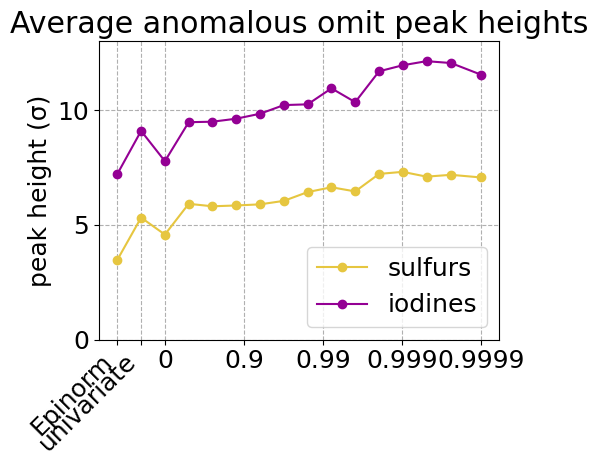

In [80]:
sulfur_atoms = []
iodine_atoms = []
for name in all_results_peak_heights.columns:
    if name[:3] == "IOD":
        iodine_atoms.append(name)
    else:
        sulfur_atoms.append(name)

iodines = all_results_peak_heights[iodine_atoms].mean(axis=1).to_numpy()
sulfurs = all_results_peak_heights[sulfur_atoms].mean(axis=1).to_numpy()

fig,ax = plt.subplots(figsize=[5.5,5])
plt.plot(np.log10(1-all_results_peak_heights["rDW"]),sulfurs,'o-',c=(0.9,0.775,0.25),label="sulfurs")
plt.plot(np.log10(1-all_results_peak_heights["rDW"]),iodines,'o-',c=(0.580392157,0.0,0.580392157),label="iodines")
plt.grid(linestyle="--")

plt.gca().invert_xaxis()
plt.xticks(ticks=[-4,-3,-2,-1,0, 0.303, 0.606],labels=["0.9999","0.999","0.99","0.9","0","univariate","Epinorm"])
ax.set_ylim([0,13])
ticks = ax.get_xticklabels()
ticks[-1].set_rotation(45)
ticks[-1].set_ha("right")
ticks[-2].set_rotation(45)
ticks[-2].set_ha("right")
ax.legend(loc='lower right')
plt.title("Average anomalous omit peak heights")
plt.ylabel("peak height (σ)")
plt.tight_layout()
plt.savefig("average_peak_heights.svg",bbox_inches="tight")
plt.show()

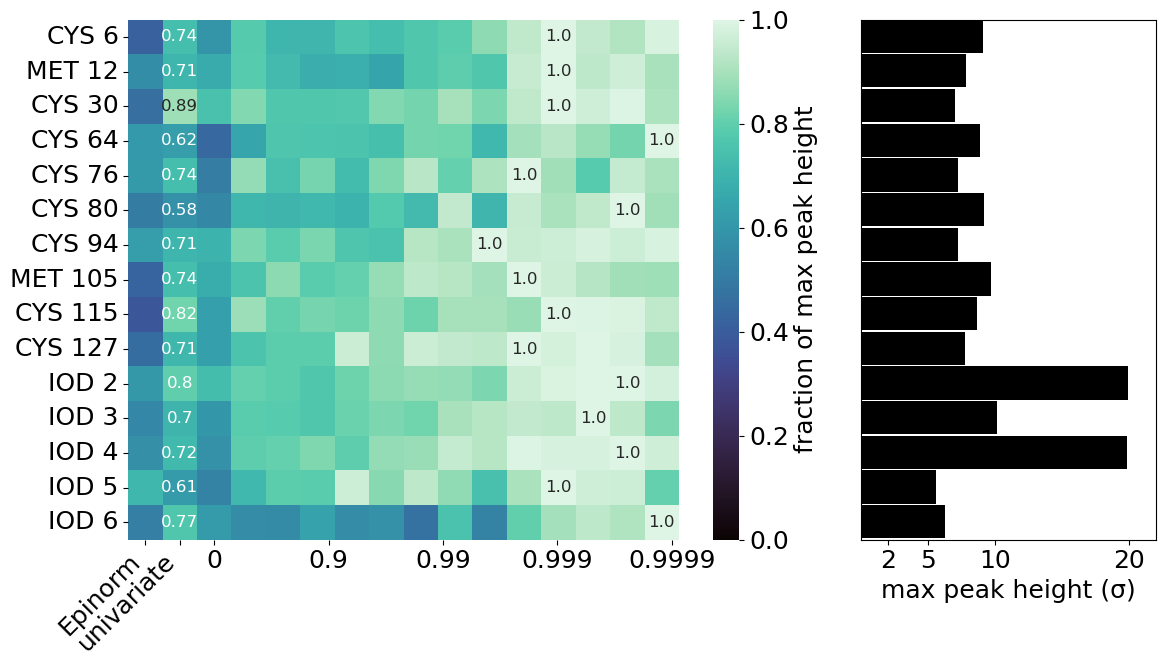

In [81]:
table = all_results_peak_heights.transpose()

table.drop(["rDW"],inplace=True)

max_table = table.max(axis="columns").to_numpy()
table = table.div(max_table, axis='rows')

def threshold(x):
    return '' if x<1 else np.round(x,1)
table_labels = table.applymap(threshold)
table_labels.iloc[:,1] = np.round(table.iloc[:,1],2)

fig = plt.figure(figsize=(12, 7))
gs = gridspec.GridSpec(1, 2, width_ratios=[0.7, 0.3])

ax1 = plt.subplot(gs[0])
sns.heatmap(table, ax=ax1, 
            cmap="mako",
            cbar_kws={'label': 'fraction of max peak height'},
            annot=table_labels,
            annot_kws={"fontsize":12},
            fmt = '')


xticks = (2.5-np.log2(1-np.array([-3,-1,0,0.9,0.99,0.999,0.9999])))
ax1.set_xticks(xticks)
ax1.set_xticklabels(["Epinorm","univariate","0","0.9","0.99","0.999","0.9999"])

ticks = ax1.get_xticklabels()
for ind,tick in enumerate(ticks):
    if ind == 0 or ind == 1:
        tick.set_rotation(45)
        tick.set_ha("right")
    else:
        tick.set_rotation(0)

ax1.collections[0].set_clim(0,1) 

ax2 = plt.subplot(gs[1], sharey=ax1)
ax2.barh(table.index, max_table, color='k', height=0.96, align='edge')
ax2.tick_params(left=False, labelleft=False)
#ax2.set_xscale("log")
ax2.set_xlim([0,22])
ax2.set_xticks([2,5,10,20])
ax2.set_xticklabels([2,5,10,20])
ax2.set_xlabel('max peak height (σ)')
plt.tight_layout()
plt.savefig("peak_heights.svg",bbox_inches="tight")

In [65]:
all_results_ccpred = pd.melt(all_results_ccpred, id_vars=['file', 'grid_id','job_id','Resolution Range (Å)','test'], value_vars=['CCpred'])
all_results_ccpred.rename(columns={'value': 'CCpred'}, inplace=True)
pivoted_df = all_results_ccpred.pivot(index=['file', 'grid_id','job_id','Resolution Range (Å)'], columns='test', values='CCpred')
pivoted_df.rename(columns={'Test': 'CCpred_test','Train': 'CCpred_train'}, inplace=True)
all_results_ccpred = pivoted_df.reset_index()

In [66]:
all_results_ccpred

test,file,grid_id,job_id,Resolution Range (Å),CCpred_test,CCpred_train
0,HEWL_dw_mlp32_PEF_R-1_0720_dmin1.8_predictions...,-1.0000,57312538,55.38 - 1.80,0.877032,0.879164
1,HEWL_dw_mlp32_PEF_R-1_0720_dmin1.8_predictions...,-1.0000,57315044,55.38 - 1.80,0.877048,0.878960
2,HEWL_dw_mlp32_PEF_R-1_0720_dmin1.8_predictions...,-1.0000,57318107,55.38 - 1.80,0.877816,0.878935
3,HEWL_dw_mlp32_PEF_R-1_0720_dmin1.8_predictions...,-1.0000,57312538,55.38 - 1.80,0.875672,0.876498
4,HEWL_dw_mlp32_PEF_R-1_0720_dmin1.8_predictions...,-1.0000,57315044,55.38 - 1.80,0.874685,0.876409
...,...,...,...,...,...,...
85,HEWL_dw_mlp32_PEF_R0.99990_0720_dmin1.8_predic...,0.9999,57318059,55.38 - 1.80,0.877027,0.877750
86,HEWL_dw_mlp32_PEF_R0.99990_0720_dmin1.8_predic...,0.9999,57319138,55.38 - 1.80,0.878060,0.878369
87,HEWL_dw_mlp32_PEF_R0.99990_0720_dmin1.8_predic...,0.9999,57315043,55.38 - 1.80,0.873656,0.875667
88,HEWL_dw_mlp32_PEF_R0.99990_0720_dmin1.8_predic...,0.9999,57318059,55.38 - 1.80,0.874897,0.875439


In [67]:
all_params.reset_index(drop=True,inplace=True)
all_results_ccpred.dropna(inplace=True)
all_results_ccpred["delay"] = [name[-5] for name in all_results_ccpred.file]
all_results_ccpred["delay"]=all_results_ccpred["delay"].astype('int32')
all_results_ccpred.sort_values(by=["grid_id","job_id"],inplace=True)
all_results_ccpred.reset_index(inplace=True)
print(all_results_ccpred.count())
all_results_ccpred.head()

test
index                   90
file                    90
grid_id                 90
job_id                  90
Resolution Range (Å)    90
CCpred_test             90
CCpred_train            90
delay                   90
dtype: int64


test,index,file,grid_id,job_id,Resolution Range (Å),CCpred_test,CCpred_train,delay
0,0,HEWL_dw_mlp32_PEF_R-1_0720_dmin1.8_predictions...,-1.0,57312538,55.38 - 1.80,0.877032,0.879164,0
1,3,HEWL_dw_mlp32_PEF_R-1_0720_dmin1.8_predictions...,-1.0,57312538,55.38 - 1.80,0.875672,0.876498,1
2,1,HEWL_dw_mlp32_PEF_R-1_0720_dmin1.8_predictions...,-1.0,57315044,55.38 - 1.80,0.877048,0.878960,0
3,4,HEWL_dw_mlp32_PEF_R-1_0720_dmin1.8_predictions...,-1.0,57315044,55.38 - 1.80,0.874685,0.876409,1
4,2,HEWL_dw_mlp32_PEF_R-1_0720_dmin1.8_predictions...,-1.0,57318107,55.38 - 1.80,0.877816,0.878935,0


We clean each of the dataframes generated and then combine them together. First, we compute a mean and standard deviation for the CCpreds.

In [68]:
all_results_ccpred = all_results_ccpred[["grid_id","delay","CCpred_test","CCpred_train"]].groupby(by=["grid_id","delay"])
all_results_ccpred = all_results_ccpred.agg(CCpred_test=("CCpred_test","mean"),
                                            CCpred_test_std=("CCpred_test","std"),
                                            CCpred_train=("CCpred_train","mean"),
                                            CCpred_train_std=("CCpred_train","std"),
                                            grid_id=("grid_id","first"),
                                            delay=("delay","first")).reset_index(drop=True)
all_results_ccpred["grid_id"]=all_results_ccpred["grid_id"].round(5)

In [69]:
all_results_ccpred

,CCpred_test,CCpred_test_std,CCpred_train,CCpred_train_std,grid_id,delay
0,0.877298,0.000448,0.879020,0.000126,-1.00000,0
1,0.875287,0.000528,0.876477,0.000060,-1.00000,1
2,0.876613,0.000614,0.878885,0.000207,0.00000,0
3,0.875385,0.001380,0.876272,0.000087,0.00000,1
4,0.877626,0.001807,0.879002,0.000204,0.50000,0
5,0.874577,0.000831,0.876589,0.000175,0.50000,1
6,0.878338,0.000659,0.878729,0.000169,0.75000,0
7,0.875026,0.001179,0.876455,0.000259,0.75000,1
8,0.877898,0.000816,0.878680,0.000243,0.87500,0
9,0.873979,0.001822,0.876569,0.000212,0.87500,1


In [70]:
def rms(row):
    return np.sqrt(np.sum(row**2))

In [71]:
all_results_ccpred = all_results_ccpred.groupby(by=["grid_id"])
all_results_ccpred = all_results_ccpred.agg(CCpred_test=("CCpred_test","mean"),
                                            CCpred_test_std=("CCpred_test_std",rms),
                                            CCpred_train=("CCpred_train","mean"),
                                            CCpred_train_std=("CCpred_train_std",rms),
                                            grid_id=("grid_id","first")).reset_index(drop=True)

we clean `cchalf`,`ccanom`, and `peak heights` tables and then merge on the grid id by `pandas`.

In [72]:
all_results = all_results_ccpred #.merge(all_results_peak_heights,on="grid_id")

In [73]:
all_results_ccanom1 = all_results_ccanom[["CCanom","grid_id","job_id","bin"]]
all_results_ccanom1 = all_results_ccanom1.groupby(by=["job_id"]).agg(CCanom=("CCanom","mean"),CCanom_std=("CCanom","std"),grid_id=("grid_id","first")).reset_index(drop=True)
all_results_ccanom1["grid_id"]=all_results_ccanom1["grid_id"].round(5)

In [74]:
all_results_cchalf1 = all_results_cchalf[["CChalf","grid_id","job_id","bin"]]
all_results_cchalf1 = all_results_cchalf1.groupby(by=["job_id"]).agg(CChalf=("CChalf","mean"),CChalf_std=("CChalf","std"),grid_id=("grid_id","first")).reset_index(drop=True)
all_results_cchalf1["grid_id"]=all_results_cchalf1["grid_id"].round(5)


In [75]:
all_results = all_results.merge(all_results_ccanom1,on="grid_id")
all_results = all_results.merge(all_results_cchalf1,on="grid_id")
all_results = all_results.rename(columns={"grid_id":"rDW"})

In [76]:
all_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CCpred_test       15 non-null     float64
 1   CCpred_test_std   15 non-null     float64
 2   CCpred_train      15 non-null     float64
 3   CCpred_train_std  15 non-null     float64
 4   rDW               15 non-null     float64
 5   CCanom            15 non-null     float64
 6   CCanom_std        15 non-null     float64
 7   CChalf            15 non-null     float64
 8   CChalf_std        15 non-null     float64
dtypes: float64(9)
memory usage: 1.2 KB


finally, we plot statistics. 

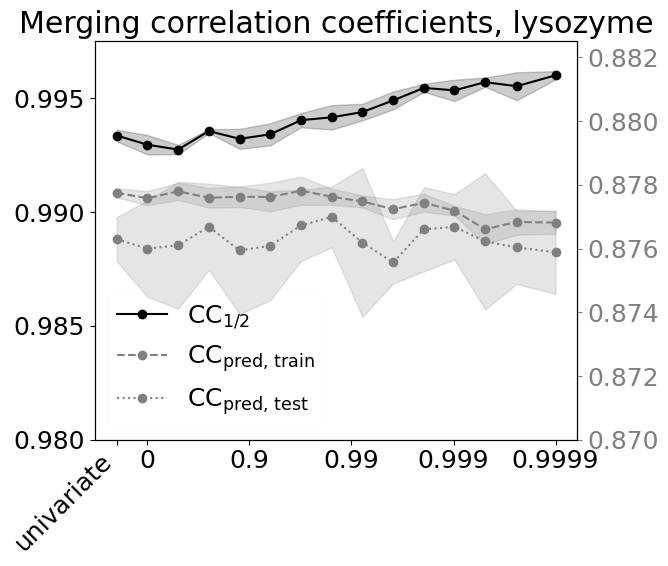

In [83]:
tmp=all_results.copy()
tmp=tmp.sort_values(by=["rDW"])

fig,ax = plt.subplots(figsize=(7,6))

lns1 = ax.plot(np.log10(1-tmp["rDW"]),tmp["CChalf"],'ko-',label=r"CC$_\text{1/2}$")
plt.fill_between(np.log10(1-tmp["rDW"]), 
                 tmp["CChalf"] - tmp["CChalf_std"], 
                 tmp["CChalf"] + tmp["CChalf_std"], 
                 color='k', alpha=0.2)

ax2 = ax.twinx()
lns2 = ax2.plot(np.log10(1-tmp["rDW"]),tmp["CCpred_train"],'o--',color="gray",label=r"CC$_\text{pred, train}$")
ax2.fill_between(np.log10(1-tmp["rDW"]), 
                 tmp["CCpred_train"] - tmp["CCpred_train_std"], 
                 tmp["CCpred_train"] + tmp["CCpred_train_std"], 
                 color='gray', alpha=0.2)

lns3 = ax2.plot(np.log10(1-tmp["rDW"]),tmp["CCpred_test"],'o:',color="gray",label=r"CC$_\text{pred, test}$")
ax2.fill_between(np.log10(1-tmp["rDW"]), 
                 tmp["CCpred_test"] - tmp["CCpred_test_std"], 
                 tmp["CCpred_test"] + tmp["CCpred_test_std"], 
                 color='gray', alpha=0.2)

plt.title("Merging correlation coefficients, lysozyme")
plt.xlabel("double-Wilson $r$")

#plt.ylabel("Correlation coefficient")
plt.gca().invert_xaxis()
plt.xticks(ticks=[-4,-3,-2,-1,0, 0.303],labels=["0.9999","0.999","0.99","0.9","0","univariate"])
#ax.set_yscale("log")
ax.set_ylim([0.98,0.9975])
ax2.set_ylim([0.87,0.8825])

ax2.tick_params(axis='y', colors='gray')
ax2.yaxis.label.set_color('gray')

ticks = ax.get_xticklabels()
ticks[-1].set_rotation(45)
ticks[-1].set_ha("right")

lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc='lower left',framealpha=0.01)

plt.tight_layout()
plt.savefig("CCs.svg",bbox_inches="tight")
plt.show()

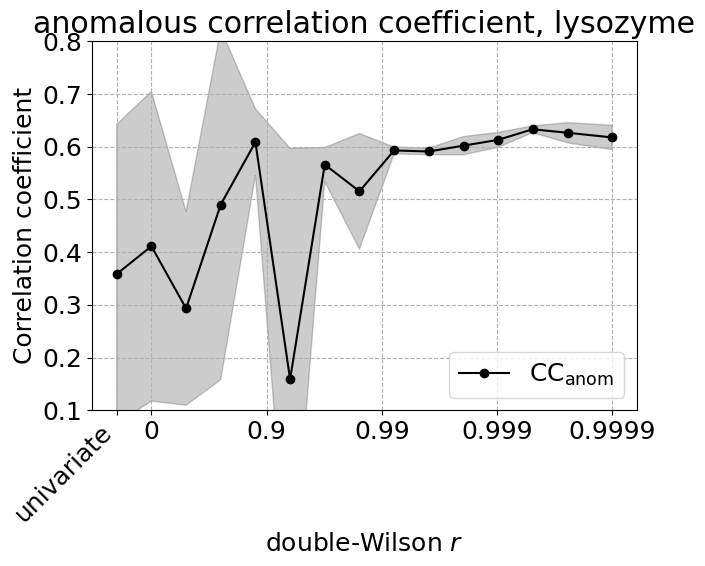

In [78]:
fig,ax = plt.subplots(figsize=(7,6))

plt.plot(np.log10(1-tmp["rDW"]),tmp["CCanom"],'ko-',label=r"CC$_\text{anom}$")
plt.fill_between(np.log10(1-tmp["rDW"]), tmp["CCanom"] - tmp["CCanom_std"], tmp["CCanom"] + tmp["CCanom_std"], color='k', alpha=0.2)

plt.grid(linestyle="--")
plt.title("anomalous correlation coefficient, lysozyme")
plt.legend(loc="lower right")
plt.xlabel("double-Wilson $r$")
plt.ylabel("Correlation coefficient")
plt.gca().invert_xaxis()
plt.xticks(ticks=[-4,-3,-2,-1,0, 0.303],labels=["0.9999","0.999","0.99","0.9","0","univariate"])
#ax.set_yscale("log")
plt.ylim([0.1,0.8])
ticks = ax.get_xticklabels()
ticks[-1].set_rotation(45)
ticks[-1].set_ha("right")
ax.legend(loc='lower right')
plt.tight_layout()
plt.savefig("CCanom.svg",bbox_inches="tight")
plt.show()

In [79]:
%%bash 

mkdir ./pymol
cd pymol
cp -r ../careless_runs/phenix_poly_dw_mlp32_PEF_R0.99902_0720_dmin1pt8/Refine_4/mlp32_PEF_R0.99902_0720_dmin1pt8_new_refine_2.pdb ./lysozyme_refine.pdb
cp -r ../careless_runs/phenix_poly_dw_mlp32_PEF_Rneg1_0720_dmin1pt8/Refine_2/mlp32_PEF_Rneg1_0720_dmin1pt8_new_refine_2.mtz lysozyme_refine_univariate.mtz
cp -r ../careless_runs/phenix_poly_dw_mlp32_PEF_R0.99902_0720_dmin1pt8/Refine_2/mlp32_PEF_R0.99902_0720_dmin1pt8_new_refine_2.mtz ./lysozyme_refine_multivariate.mtz

mkdir: cannot create directory ‘./pymol’: File exists
